In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

## Using k-NN

In [2]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

In [3]:
# Function cost 
def cost(mat):
    cost = 0

    for i in range(0,len(mat)-1) :
        cost += euclidean_distance(mat[i], mat[i+1])
        
    cost += euclidean_distance(mat[0], mat[-1])

    return cost

In [4]:
# Function to find the nearest unvisited point
def find_nearest_unvisited_point(current_point, unvisited_points):
    min_distance = float("inf")
    nearest_point = None
    for point in unvisited_points:
        distance = euclidean_distance(current_point, point)
        if distance < min_distance:
            min_distance = distance
            nearest_point = point
    return nearest_point

In [5]:
# Function to solve the problem using nearest neighbor algorithm with a chosen starting point
def solve1(points, starting_point):
    n = len(points)
    unvisited = list(points)
    tour = [unvisited.pop(starting_point)]  # Start with a random point
    while unvisited:
        nearest_point = find_nearest_unvisited_point(tour[-1], unvisited)
        tour.append(unvisited.pop(unvisited.index(nearest_point)))
    return tour

In [6]:
# Function to solve the problem using nearest neighbor algorithm looking at the best starting point
def solve2(points):
    n = len(points)
    best_tour = None
    best_cost = float("inf")
    best_starting_point = 0

    for starting_point in range(n):
        tour = solve1(points, starting_point)  # Use the existing solve1 function
        current_cost = cost(tour)
        
        if current_cost < best_cost:
            best_cost = current_cost
            best_tour = tour
            best_starting_point = starting_point

    return best_starting_point

In [7]:
# Generate random points
n = 100
points = np.random.rand(n, 2)

In [8]:
# Apply the Solve function
starting_point = randrange(n) # Select a random starting point
tour1 = solve1(points.tolist(), starting_point)

In [9]:
tour2 = solve1(points.tolist(), solve2(points.tolist()))

In [10]:
# Extract x and y coordinates for plotting
x1, y1 = zip(*tour1)
x2, y2 = zip(*tour2)

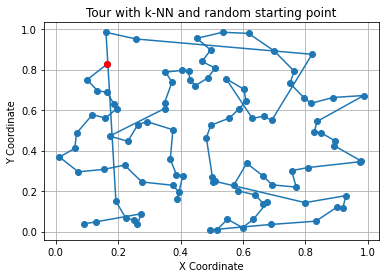

9.855481043915244


In [11]:
# Plot the "road"
plt.figure()
plt.plot(x1, y1, 'o-')
plt.title("Tour with k-NN and random starting point")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)

# Add a red dot at the starting point
plt.plot(points[starting_point][0], points[starting_point][1], 'ro')

plt.show()

print(cost(tour1))

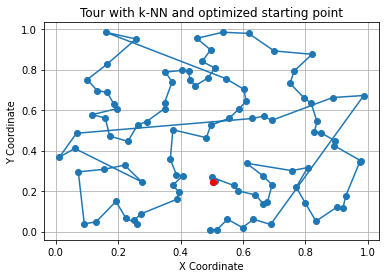

8.992549909016136


In [12]:
# Plot the "road"
plt.figure()
plt.plot(x2, y2, 'o-')
plt.title("Tour with k-NN and optimized starting point")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)

# Add a red dot at the starting point
plt.plot(points[solve2(points.tolist())][0], points[solve2(points.tolist())][1], 'ro')

plt.show()

print(cost(tour2))

## Combining the 2-opt Algorithm with the k-NN

In this code, the solve2opt function combines the nearest neighbor algorithm with the 2-opt optimization. It starts with a nearest neighbor solution and then improves it using the 2-opt algorithm to find an optimized tour.

In [13]:
# Function to apply the 2-opt optimization
def two_opt(points):
    n = len(points)
    improved = True
    while improved:
        improved = False
        for i in range(1, n - 2):
            for j in range(i + 2, n):
                if euclidean_distance(points[i], points[i+1]) + euclidean_distance(points[j], points[(j+1) % n]) > euclidean_distance(points[i], points[j]) + euclidean_distance(points[i+1], points[(j+1) % n]):
                    points[i+1:j+1] = points[j:i:-1]  # Reverse the tour segment
                    improved = True
    return points

# Function to solve the problem using the nearest neighbor algorithm with 2-opt optimization
def solve2opt(points):
    starting_point = solve2(points.tolist())  # Best starting point
    tour = solve1(points.tolist(), solve2(points.tolist()))  # Initial solution
    optimized_tour = two_opt(tour)  # Apply 2-opt optimization
    return optimized_tour

In [14]:
tour3=solve2opt(points)

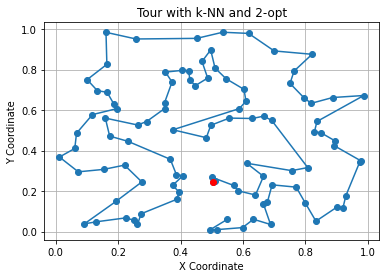

7.830779758893111


In [15]:
x3, y3 = zip(*tour3)

# Plot the "road"
plt.figure()
plt.plot(x3, y3, 'o-')
plt.title("Tour with k-NN and 2-opt")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)

# Add a red dot at the starting point
plt.plot(tour3[0][0], tour3[0][1], 'ro')

plt.show()

print(cost(tour3))

# Création d'une classe

In [16]:
class TSPSolver:
    def __init__(self, points):
        self.points = points

    def euclidean_distance(self, point1, point2):
        return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

    def cost(self, mat):
        cost = 0
        for i in range(0, len(mat) - 1):
            cost += self.euclidean_distance(mat[i], mat[i + 1])
        cost += self.euclidean_distance(mat[0], mat[-1])
        return cost

    def find_nearest_unvisited_point(self, current_point, unvisited_points):
        min_distance = float("inf")
        nearest_point = None
        for point in unvisited_points:
            distance = self.euclidean_distance(current_point, point)
            if distance < min_distance:
                min_distance = distance
                nearest_point = point
        return nearest_point

    def solve1(self, starting_point):
        n = len(self.points)
        unvisited = list(self.points)
        tour = [unvisited.pop(starting_point)]
        while unvisited:
            nearest_point = self.find_nearest_unvisited_point(tour[-1], unvisited)
            tour.append(unvisited.pop(unvisited.index(nearest_point)))
        return tour


    def solve2(self):
        n = len(self.points)
        best_tour = None
        best_cost = float("inf")
        best_starting_point = 0

        for starting_point in range(n):
            tour = self.solve1(starting_point)
            current_cost = self.cost(tour)

            if current_cost < best_cost:
                best_cost = current_cost
                best_tour = tour
                best_starting_point = starting_point

        return best_starting_point

    def two_opt(self, points):
        n = len(points)
        improved = True
        while improved:
            improved = False
            for i in range(1, n - 2):
                for j in range(i + 2, n):
                    if (
                        self.euclidean_distance(points[i], points[i + 1])
                        + self.euclidean_distance(points[j], points[(j + 1) % n])
                        > self.euclidean_distance(points[i], points[j])
                        + self.euclidean_distance(points[i + 1], points[(j + 1) % n])
                    ):
                        points[i + 1 : j + 1] = points[j:i:-1]
                        improved = True
        return points

    def solve2opt(self):
        starting_point = solve2(points) 
        tour = self.solve1(starting_point)
        optimized_tour = self.two_opt(tour)
        return optimized_tour


In [17]:
points = points.tolist()

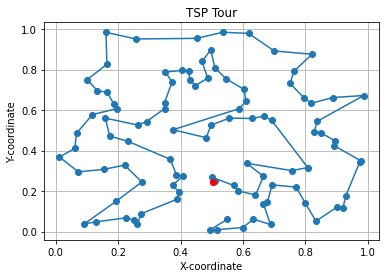

7.830779758893111


In [18]:
# Create an instance of the TSPSolver
tsp_solver = TSPSolver(points)

# Solve the TSP using the nearest neighbor algorithm with 2-opt optimization
optimized_tour = tsp_solver.solve2opt()

# Extract x and y coordinates for plotting
x = [point[0] for point in optimized_tour]
y = [point[1] for point in optimized_tour]

# Plot the TSP tour
plt.figure()
plt.plot(x, y, 'o-')
plt.title("TSP Tour")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.grid()
plt.plot(optimized_tour[0][0], optimized_tour[0][1], 'ro')
plt.show()

print(tsp_solver.cost(optimized_tour))


# Evaluation

Evaluer sur 100 instances et faire le coût moyen

In [19]:
costs=[]
n=100

for i in range(n):
    print(i+1)
    points = np.random.rand(100, 2).tolist()
    tsp_solver = TSPSolver(points)
    optimized_tour = tsp_solver.solve2opt()
    instance_cost = tsp_solver.cost(optimized_tour)
    costs.append(instance_cost)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [20]:
mean = np.mean(costs)
min_val = np.min(costs)
max_val = np.max(costs)

summary_stats = pd.DataFrame({'Statistic': ['Mean', 'Minimum', 'Maximum'],
                              'Value': [mean, min_val, max_val]})

print(summary_stats)

  Statistic     Value
0      Mean  8.216552
1   Minimum  7.475774
2   Maximum  8.814170
